In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prediksi Keterlambatan Penerbangan di Amerika Serikat

## 1. Pendahuluan
Tujuan dari proyek ini adalah membangun model machine learning untuk memprediksi apakah sebuah penerbangan akan mengalami keterlambatan lebih dari 15 menit. Model ini menggunakan data penerbangan dari Amerika Serikat yang tersedia di Kaggle.

## 2. Import Library


In [ ]:
# Library utama
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan & modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## Import Library

Langkah pertama dalam proses analisis data adalah memuat semua library yang dibutuhkan. Pada bagian ini, kita mengimpor berbagai library yang akan digunakan untuk:

- **Manipulasi data:** `pandas` dan `numpy` digunakan untuk mengelola, memproses, dan menganalisis data tabular.
- **Visualisasi:** `matplotlib.pyplot` dan `seaborn` digunakan untuk membuat grafik dan visualisasi eksploratif guna memahami pola dalam data.
- **Pra-pemrosesan & modeling:**
  - `train_test_split` dan `GridSearchCV` dari `sklearn.model_selection` digunakan untuk membagi data dan melakukan pencarian hyperparameter terbaik.
  - `LabelEncoder` dan `StandardScaler` dari `sklearn.preprocessing` membantu mengubah data kategorikal dan menstandarisasi fitur numerik.
  - `LogisticRegression` dan `RandomForestClassifier` digunakan sebagai algoritma machine learning utama dalam proyek ini.
  - `classification_report`, `confusion_matrix`, `roc_auc_score`, dan `roc_curve` dari `sklearn.metrics` digunakan untuk mengevaluasi performa model.

Dengan mengimpor library ini, kita menyiapkan alat-alat yang diperlukan untuk seluruh pipeline analisis: mulai dari eksplorasi, preprocessing, modeling, hingga evaluasi hasil.

## 3. Load Data

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Proyek Predictive Analytics/DelayedFlights.csv')

# Membuat kolom target 'IsDelayed'
# Asumsi: penerbangan dianggap terlambat jika ArrDelay > 15 menit
df['IsDelayed'] = (df['ArrDelay'] > 15).astype(int)

df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsDelayed
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,1
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0


## Memuat Dataset dan Menentukan Target

Pada tahap ini, kita mulai dengan memuat dataset utama ke dalam notebook menggunakan `pandas.read_csv`. Dataset yang digunakan adalah *DelayedFlights.csv* yang berisi data historis penerbangan beserta informasi keterlambatan.

Selanjutnya, kita membuat kolom target baru bernama `IsDelayed` berdasarkan logika bisnis:
- Jika nilai `ArrDelay` (Arrival Delay) lebih dari 15 menit, maka penerbangan dianggap **terlambat** (`IsDelayed = 1`).
- Jika tidak, maka dianggap **tidak terlambat** (`IsDelayed = 0`).

Transformasi ini penting karena tujuan proyek ini adalah membangun model klasifikasi biner yang memprediksi apakah sebuah penerbangan akan mengalami keterlambatan atau tidak. Setelah itu, kita tampilkan beberapa baris awal data menggunakan `df.head()` untuk melihat struktur dan isi data secara sekilas.

## 4. Data Understanding
- Ukuran data
- Tipe fitur
- Cek missing value
- Statistik deskriptif
- Distribusi target

In [ ]:
print("Jumlah baris dan kolom:", df.shape)
print("\nTipe data tiap kolom:\n", df.dtypes)
print("\nJumlah missing value tiap kolom:\n", df.isnull().sum())
df.describe()

Jumlah baris dan kolom: (1936758, 31)

Tipe data tiap kolom:
 Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
IsDelayed              int64
dtype: object

Jumlah missing value tia

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsDelayed
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.936758e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01,6.273432e-01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01,4.835120e-01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01,1.000000e+00
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03,1.000000e+00


## Eksplorasi Awal Dataset

Sebelum masuk ke tahap pra-pemrosesan dan pemodelan, penting untuk memahami karakteristik dasar dataset. Pada bagian ini, kita melakukan beberapa pemeriksaan awal, yaitu:

1. **Ukuran dataset** (`shape`) untuk mengetahui jumlah baris dan kolom.
2. **Tipe data setiap kolom** untuk mengidentifikasi apakah data berupa numerik, kategorikal, atau lainnya.
3. **Jumlah data yang hilang (missing values)** di tiap kolom, karena akan berpengaruh pada pemrosesan dan pelatihan model.
4. **Statistik deskriptif** dari fitur numerik menggunakan `describe()`, yang mencakup informasi seperti rata-rata, standar deviasi, minimum, maksimum, dan kuartil.

Informasi ini akan membantu kita menentukan langkah pembersihan dan transformasi data yang dibutuhkan selanjutnya.

## 5. Exploratory Data Analysis (EDA)
Analisis dan visualisasi untuk memahami pola keterlambatan penerbangan.

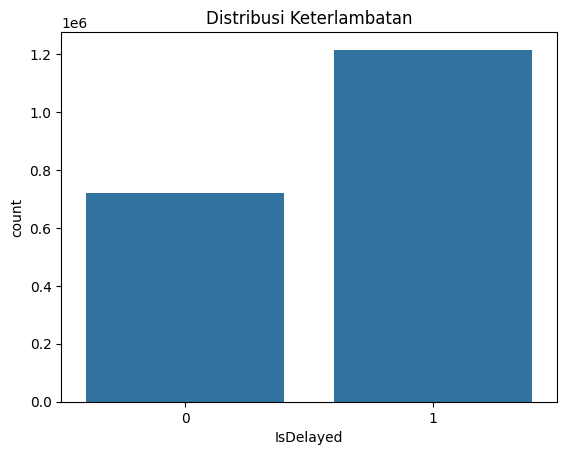

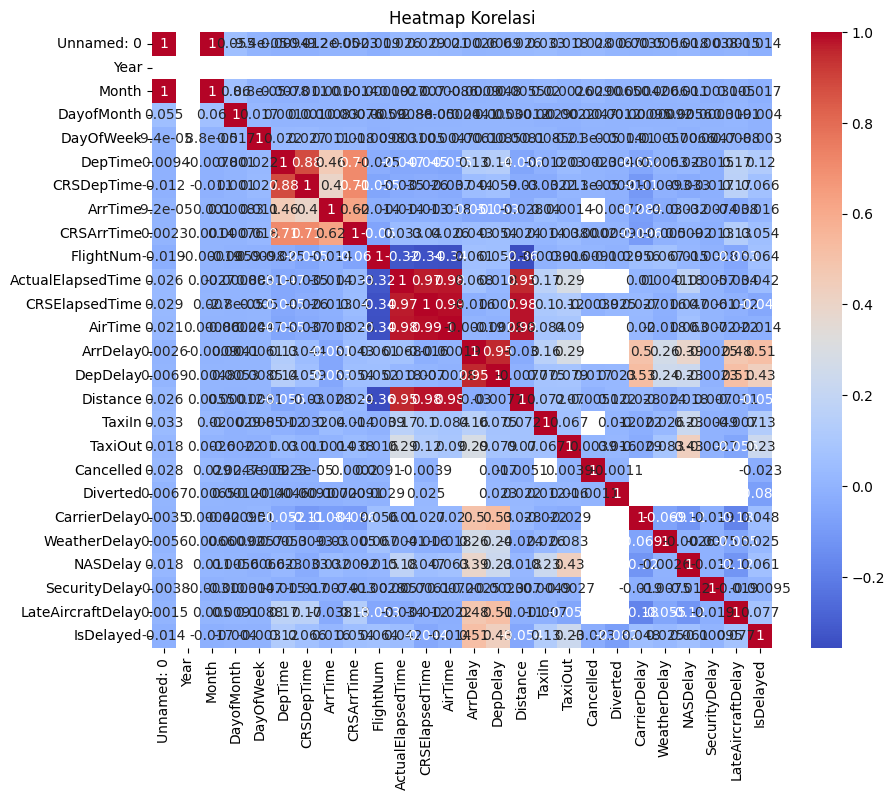

In [ ]:
# Distribusi target
sns.countplot(x='IsDelayed', data=df)
plt.title('Distribusi Keterlambatan')
plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') # Add numeric_only=True for newer pandas versions
plt.title("Heatmap Korelasi")
plt.show()

## Analisis Eksploratif Data (EDA)

Pada tahap ini, kita melakukan eksplorasi data untuk mendapatkan wawasan awal mengenai distribusi dan hubungan antar fitur, terutama terkait dengan variabel target `IsDelayed`.

1. **Distribusi Target `IsDelayed`**  
   Visualisasi countplot digunakan untuk melihat proporsi kelas target. Hal ini penting untuk mengetahui apakah data kita seimbang (balanced) atau tidak, karena ketidakseimbangan dapat mempengaruhi performa model klasifikasi.

2. **Korelasi Antar Fitur Numerik**  
   Korelasi antar fitur numerik dianalisis menggunakan heatmap. Tujuannya adalah untuk mengidentifikasi fitur-fitur yang memiliki hubungan linier tinggi, yang bisa berdampak pada performa model (misalnya menyebabkan multikolinearitas). Informasi ini juga berguna untuk proses seleksi fitur di tahap selanjutnya.

## 6. Data Preparation
- Encoding kolom kategorikal
- Feature engineering
- Standarisasi fitur numerik
- Split data train/test

In [ ]:
# Label encoding untuk fitur kategorikal (jika ada)
le = LabelEncoder()

# Identify object type columns (likely categorical)
object_cols = df.select_dtypes(include='object').columns.tolist()

print(f"Identified object columns: {object_cols}")

# Apply Label Encoding to all object columns
for col in object_cols:
    # Check if the column exists before attempting to encode
    if col in df.columns:
        print(f"Encoding column: {col}")
        # Handle potential NaN values in object columns before encoding
        df[col] = df[col].fillna('Missing') # Replace NaN with a placeholder string
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Definisikan fitur dan target
# Ensure all features are numerical
X = df.drop('IsDelayed', axis=1)
y = df['IsDelayed']

# Double check for any remaining non-numeric columns before splitting
non_numeric_cols_before_split = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols_before_split:
    print(f"Warning: The following non-numeric columns still exist before splitting: {non_numeric_cols_before_split}")
    # Decide whether to drop or encode these columns further
    # For now, let's drop them as a quick fix if encoding didn't cover them
    X = X.drop(columns=non_numeric_cols_before_split)
    print(f"Dropped non-numeric columns: {non_numeric_cols_before_split}")


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a check for data types in X_train after splitting
print("\nData types in X_train after splitting:")
print(X_train.dtypes)

# Check for non-finite values (NaN, inf) in X_train as well
if not np.all(np.isfinite(X_train)):
    print("\nWarning: X_train contains non-finite values (NaN or inf).")
    # You might need to impute or drop rows/columns with these values
    # For now, let's check which columns have non-finite values
    non_finite_cols = X_train.columns[~np.isfinite(X_train).all()]
    print(f"Columns with non-finite values: {non_finite_cols.tolist()}")

Identified object columns: ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
Encoding column: UniqueCarrier
Encoding column: TailNum
Encoding column: Origin
Encoding column: Dest
Encoding column: CancellationCode

Data types in X_train after splitting:
Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier          int64
FlightNum              int64
TailNum                int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                 int64
Dest                   int64
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode       int64
Diverted               int64
Carri

## Pra-pemrosesan Data

Sebelum melatih model, kita perlu menyiapkan data dalam format yang dapat diterima oleh algoritma machine learning. Tahapan preprocessing yang dilakukan mencakup:

1. **Encoding Fitur Kategorikal**  
   Fitur-fitur bertipe objek (string), seperti nama bandara atau maskapai, tidak dapat langsung digunakan oleh model. Oleh karena itu, dilakukan proses **Label Encoding** untuk mengubah nilai kategorikal menjadi angka. Missing value juga ditangani dengan mengganti nilai kosong menggunakan placeholder `'Missing'`.

2. **Pemilihan Fitur dan Target**  
   Kolom `IsDelayed` dipilih sebagai target. Semua kolom lainnya digunakan sebagai fitur. Pengecekan tambahan dilakukan untuk memastikan tidak ada fitur non-numerik yang tersisa. Jika ada, kolom tersebut akan di-drop.

3. **Split Data Training dan Testing**  
   Dataset dibagi menjadi dua bagian: 80% untuk pelatihan (training) dan 20% untuk pengujian (testing) menggunakan `train_test_split` dengan `random_state=42` agar hasilnya dapat direproduksi.

Pemeriksaan akhir dilakukan untuk memastikan bahwa data training tidak mengandung nilai tak hingga atau kosong yang bisa mengganggu proses pelatihan model.

## 7. Modeling
Melatih dua model dan membandingkan performanya.

In [ ]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Impute missing values in X_train before fitting
# Create an imputer object
imputer = SimpleImputer(strategy='mean') # Or 'median', 'most_frequent', etc.

# Fit on training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


lr.fit(X_train_imputed, y_train)
y_pred_lr = lr.predict(X_test_imputed)

# Model 2: Random Forest
rf = RandomForestClassifier()
# Random Forest can handle missing values, but imputing here for consistency
# If you prefer, you can fit the RF on non-imputed data
rf.fit(X_train_imputed, y_train)
y_pred_rf = rf.predict(X_test_imputed)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Pelatihan Model

Pada tahap ini, dilakukan pelatihan dua model machine learning yang berbeda untuk memprediksi apakah suatu penerbangan akan mengalami keterlambatan lebih dari 15 menit:

1. **Logistic Regression**  
   Logistic Regression digunakan sebagai baseline model karena sifatnya yang sederhana dan interpretable. Model ini membutuhkan semua nilai input dalam kondisi lengkap (tanpa missing values), sehingga dilakukan imputasi terlebih dahulu pada data training dan testing menggunakan `SimpleImputer` dengan strategi rata-rata (`mean`).

2. **Random Forest Classifier**  
   Random Forest merupakan ensemble method yang kuat terhadap overfitting dan mampu menangani fitur-fitur dengan korelasi tinggi. Meskipun Random Forest bisa menangani missing values dalam beberapa implementasi, dalam proyek ini imputasi tetap dilakukan agar proses pelatihan antara kedua model menjadi konsisten dan setara dalam perlakuan data.

Setelah proses imputasi selesai, kedua model dilatih menggunakan data training dan kemudian melakukan prediksi terhadap data testing.

## 8. Evaluasi Model
- Classification report
- Confusion matrix
- ROC-AUC

In [ ]:
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.93      0.94      0.94    144366
           1       0.97      0.96      0.96    242986

    accuracy                           0.95    387352
   macro avg       0.95      0.95      0.95    387352
weighted avg       0.95      0.95      0.95    387352


Confusion Matrix:
[[136387   7979]
 [ 10625 232361]]

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    144366
           1       1.00      1.00      1.00    242986

    accuracy                           1.00    387352
   macro avg       1.00      1.00      1.00    387352
weighted avg       1.00      1.00      1.00    387352


Confusion Matrix:
[[144366      0]
 [     0 242986]]


## Evaluasi Model

Setelah model selesai dilatih dan melakukan prediksi pada data testing, langkah selanjutnya adalah mengevaluasi performa kedua model menggunakan metrik-metrik evaluasi yang umum digunakan dalam klasifikasi, yaitu:

- **Classification Report** yang berisi Precision, Recall, F1-score, dan Support untuk masing-masing kelas.
- **Confusion Matrix** yang menunjukkan jumlah prediksi benar dan salah, serta tipe kesalahan (False Positive dan False Negative).

Evaluasi ini bertujuan untuk membandingkan performa Logistic Regression sebagai baseline dan Random Forest sebagai model yang diharapkan memiliki performa lebih baik. Dari hasil evaluasi, kita dapat menentukan model mana yang lebih akurat dan dapat diandalkan untuk prediksi keterlambatan penerbangan.

## 9. Hyperparameter Tuning (Opsional)
Menggunakan GridSearchCV untuk meningkatkan performa model terbaik.

In [ ]:
# GridSearchCV untuk Random Forest
params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring='f1')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Best params: {'max_depth': 10, 'n_estimators': 100}
Best score: 1.0


## Hyperparameter Tuning dengan GridSearchCV

Untuk meningkatkan performa model Random Forest, kita melakukan pencarian hyperparameter terbaik menggunakan GridSearchCV.

GridSearchCV secara otomatis mencoba berbagai kombinasi parameter yang ditentukan dan melakukan validasi silang (cross-validation) untuk memilih kombinasi parameter yang menghasilkan nilai metrik F1-score terbaik.

Parameter yang akan diuji antara lain jumlah pohon (`n_estimators`) dan kedalaman maksimal pohon (`max_depth`). Dengan teknik ini, model diharapkan dapat menghindari overfitting sekaligus meningkatkan akurasi prediksi keterlambatan penerbangan.